In [74]:
import pandas as pd
import numpy as np

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

In [131]:
df_price = pd.read_csv('./cluster/df_price_cluster.csv')
df_sales = pd.read_csv('./cluster/df_sales_cluster.csv')

In [132]:
df_price.head(1)
del(df_price['Unnamed: 0'])

In [133]:
df_sales.head(1)
del(df_sales['Unnamed: 0'])

In [134]:
df_cluster = pd.merge(df_price, df_sales, on=['item'], how='left')
df_cluster.head(1)

,item,price_min,price_max,price_mean,number_sales
0,ACCESORIES_1_001,6.65,12.7414,11.032755,4093


In [52]:
# price_max = precio max
# price_min = precio min
# price_mean = precio promedio
# number_sales = total de productos vendidos

In [135]:
#Creo la columna ""total_income" que representa los ingresos totales por producto
df_cluster['total_income']= df_cluster['price_mean']*df_cluster['number_sales']
df_cluster.head(2)

,item,price_min,price_max,price_mean,number_sales,total_income
0,ACCESORIES_1_001,6.65,12.7414,11.032755,4093,45157.065966
1,ACCESORIES_1_002,2.66,5.2801,5.275708,5059,26689.806185


In [169]:
df_cluster.describe().T

,count,mean,std,min,25%,50%,75%,max
price_min,3049.0,3.630382,3.568067,0.012000,1.237500,2.400000,4.776000,3.588340e+01
price_max,3049.0,5.974956,5.517955,0.300000,2.856000,4.416000,7.475000,1.341500e+02
price_mean,3049.0,5.566813,4.538464,0.239601,2.628430,4.185494,7.190740,3.949448e+01
number_sales,3049.0,21535.840603,44223.757223,568.000000,4310.000000,9518.000000,21391.000000,1.001483e+06
total_income,3049.0,76025.437578,113663.958012,558.879300,21808.820666,43503.828743,84020.849379,1.758793e+06
k_means,3049.0,0.370613,0.762302,0.000000,0.000000,0.000000,0.000000,3.000000e+00


<Axes: xlabel='number_sales', ylabel='total_income'>

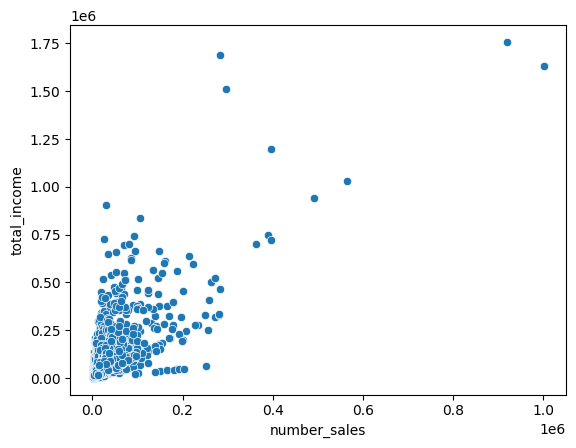

In [136]:
sns.scatterplot(data= df_cluster , x='number_sales', y='total_income')

In [137]:
df_cluster1 = df_cluster.copy()

In [138]:
df_cluster1.drop(columns=['item','price_min','number_sales'], axis=1,inplace=True)

In [139]:
df_cluster1.head(1)

,price_max,price_mean,total_income
0,12.7414,11.032755,45157.065966


In [ ]:
# Empiezo a clusterizar

## Escalo mis variables

In [140]:
from sklearn.preprocessing import StandardScaler
scaaler = StandardScaler()
df_cluster_scaled = scaaler.fit_transform(df_cluster1)

In [141]:
df_cluster_scaled.head()

,price_max,price_mean,total_income
0,1.226460,1.204557,-0.271620
1,-0.125947,-0.064152,-0.434119
2,0.356195,-0.357600,-0.619169
3,0.035570,0.091783,1.392759
4,-0.340500,-0.382283,-0.175951


## Usando PCA

In [142]:
from sklearn.decomposition import PCA

In [143]:
pca = PCA()
pca.fit(df_cluster_scaled)
pca_data_scaled = pca.transform(df_cluster_scaled)
pca_data_scaled

,pca0,pca1,pca2
0,1.626425,-0.619338,-0.010098
1,-0.220738,-0.396675,0.048600
2,-0.128829,-0.611612,-0.497449
3,0.374472,1.344873,0.023563
4,-0.536373,-0.067469,-0.028141
...,...,...,...
3044,-0.684346,-0.077970,-0.037118
3045,-0.825446,-0.284268,-0.037940
3046,-0.203476,-0.041064,-0.005689
3047,-1.275239,-0.248082,-0.054852


In [144]:
var = pca.explained_variance_ratio_
print(var)

[0.64012348 0.31983787 0.04003864]


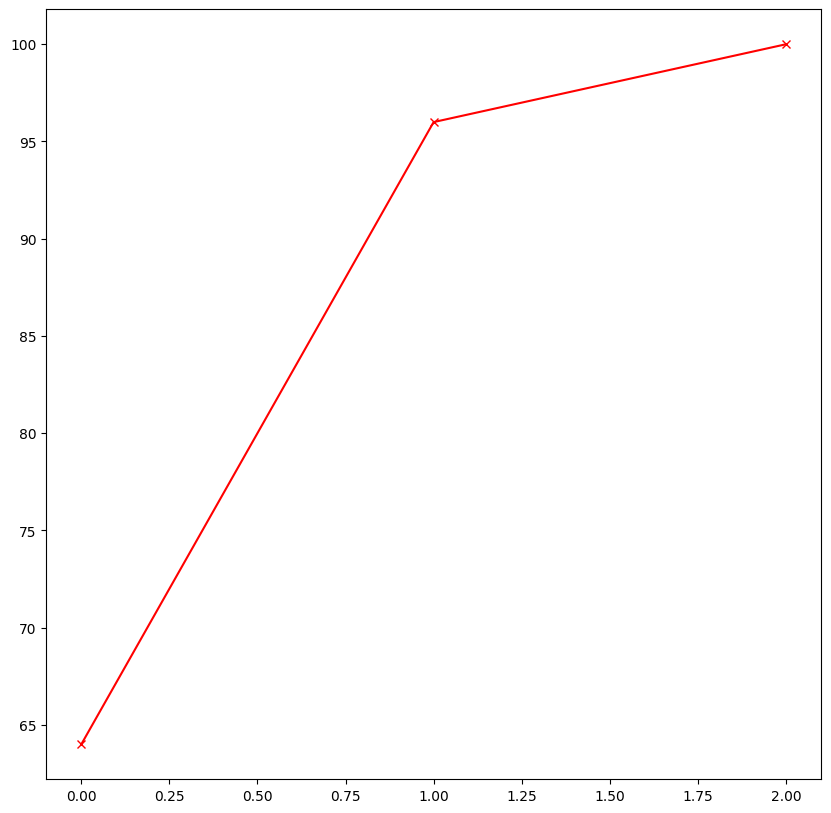

In [145]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

In [157]:
sum_of_squared_distances = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(df_cluster1)
    sum_of_squared_distances.append(km.inertia_)

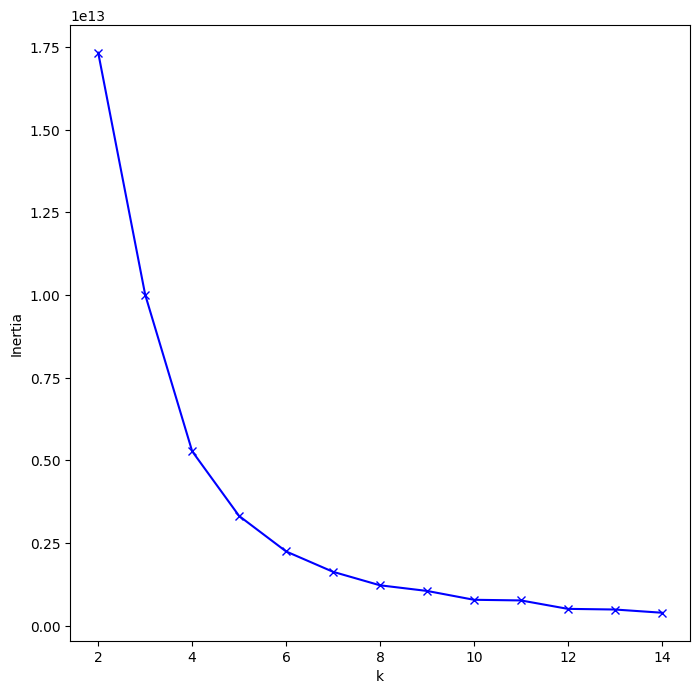

In [158]:
plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [163]:
# Uso el kmean de acuerdo a identificar el "codo"
km = KMeans(n_clusters = 4)
y = km.fit_predict(df_cluster1)
#print(silhouette_score(df_cluster_scaled, y))
df_cluster['k_means'] = y

In [161]:
# Clustered completed
df_cluster.head(2)

,item,price_min,price_max,price_mean,number_sales,total_income,k_means
0,ACCESORIES_1_001,6.65,12.7414,11.032755,4093,45157.065966,0
1,ACCESORIES_1_002,2.66,5.2801,5.275708,5059,26689.806185,0


In [ ]:
df_cluster

In [ ]:
# #Hago merge del clusterizado con original para poder plotear
# df_clusterizado = df_cluster.merge(df_cluster1, on =['price_max','price_min','total_income'], how='left')
# df_clusterizado.head(2)

<function matplotlib.pyplot.show(close=None, block=None)>

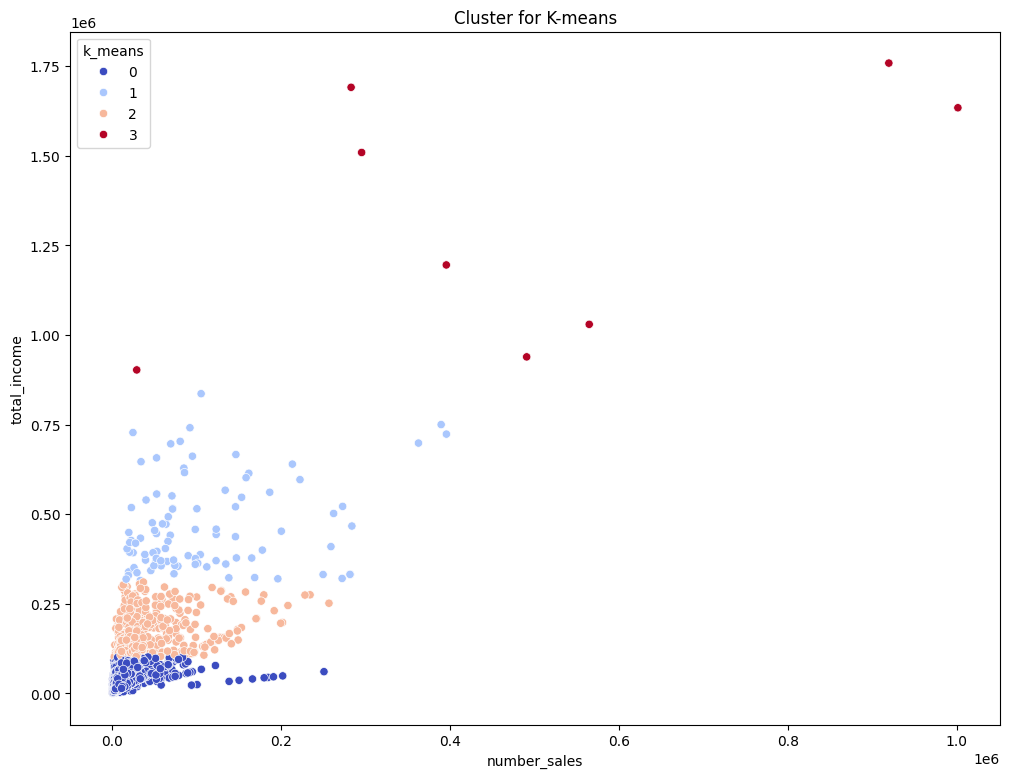

In [180]:
plt.figure(figsize=(12,9))
plt.title('Cluster for K-means')
sns.scatterplot(data=df_cluster, x='number_sales', y='total_income', hue='k_means',palette='coolwarm')
plt.show